# Задание

**Контекст**

Вы — аналитик интернет-магазина. Перед вами стоит задача найти и исправить проблемы с данными.

**Описание задания**

Задание 1. Поиск дубликатов: определите количество строк, являющихся полными дубликатами; отфильтруйте из данных строки , содержащие пропуски по цене.

Задание 2.Определение выбросов: для категории «Одежда и обувь» определите 5% и 95% порог по цене заказа; нарисуйте гистограмму распределения полученных данных по цене заказа.

In [125]:
import pandas as pd

In [126]:
# Загружаем данные
data = pd.read_csv('data/sales_with_duplicates.csv')
data

,order_id,date,customer_id,category,region,sales,quantity,discount
0,14186940,2017-07-20,513,Спорт и отдых,Краснодарский край,10414.0,3,0.00
1,46863464,2017-01-27,514,Спорт и отдых,Владимирская область,4147.0,3,0.00
2,98992195,2017-01-22,514,Продукты питания,Владимирская область,1136.0,4,0.00
3,29193654,2018-02-18,514,Продукты питания,Владимирская область,938.0,1,0.03
4,63339281,2017-01-23,518,Одежда и обувь,Краснодарский край,1135.0,1,0.00
...,...,...,...,...,...,...,...,...
1688219,92523241,2019-06-10,100505,Бытовая техника,Московская область,20935.0,4,0.00
1688220,49804946,2019-12-21,100505,Аптека,Московская область,907.0,4,0.00
1688221,80849013,2019-12-31,100505,Аптека,Московская область,1306.0,3,0.00
1688222,117928,2019-10-19,100506,Аптека,Смоленская область,566.0,2,0.00


In [127]:
# Смотрим основные показатели
data.describe()

,order_id,customer_id,sales,quantity,discount
count,1.688224e+06,1.688224e+06,1.671362e+06,1.688224e+06,1.688224e+06
mean,4.998104e+07,5.050314e+04,4.594492e+03,2.501221e+00,2.993392e-02
std,2.888130e+07,2.889426e+04,4.778789e+03,1.037268e+00,3.648207e-02
min,0.000000e+00,5.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.498912e+07,2.547700e+04,1.347000e+03,2.000000e+00,0.000000e+00
50%,4.996138e+07,5.051500e+04,2.862000e+03,2.000000e+00,0.000000e+00
75%,7.500399e+07,7.556600e+04,5.971000e+03,3.000000e+00,5.000000e-02
max,9.999998e+07,1.005110e+05,4.327700e+04,8.000000e+00,1.000000e-01


<Axes: >

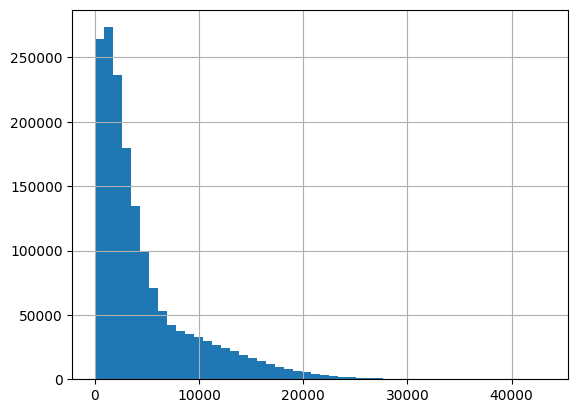

In [128]:
# Посмотрим на распределение сумм продаж
data['sales'].hist(bins=50)

## Задание 1: Поиск дубликатов

In [129]:
# Ищем дубликаты
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1688219    False
1688220    False
1688221    False
1688222    False
1688223    False
Length: 1688224, dtype: bool

In [130]:
# Убираем дубликаты из данных
data_dedup = data.drop_duplicates()
data_dedup

,order_id,date,customer_id,category,region,sales,quantity,discount
0,14186940,2017-07-20,513,Спорт и отдых,Краснодарский край,10414.0,3,0.00
1,46863464,2017-01-27,514,Спорт и отдых,Владимирская область,4147.0,3,0.00
2,98992195,2017-01-22,514,Продукты питания,Владимирская область,1136.0,4,0.00
3,29193654,2018-02-18,514,Продукты питания,Владимирская область,938.0,1,0.03
4,63339281,2017-01-23,518,Одежда и обувь,Краснодарский край,1135.0,1,0.00
...,...,...,...,...,...,...,...,...
1688219,92523241,2019-06-10,100505,Бытовая техника,Московская область,20935.0,4,0.00
1688220,49804946,2019-12-21,100505,Аптека,Московская область,907.0,4,0.00
1688221,80849013,2019-12-31,100505,Аптека,Московская область,1306.0,3,0.00
1688222,117928,2019-10-19,100506,Аптека,Смоленская область,566.0,2,0.00


In [131]:
# Посмотрим на товары с пропусками в цене
data_noprice = data[(data['sales'] == 0)]
data_noprice

,order_id,date,customer_id,category,region,sales,quantity,discount
6751,24139431,2017-09-07,6444,Продукты питания,Иркутская область,0.0,4,0.10
7908,12658467,2017-02-05,7460,Одежда и обувь,Иркутская область,0.0,2,0.10
11861,5868080,2017-03-06,10927,Одежда и обувь,Владимирская область,0.0,5,0.00
15028,99063319,2017-02-22,13651,Одежда и обувь,Амурская область,0.0,2,0.10
15483,39303547,2017-10-21,14108,Продукты питания,Московская область,0.0,5,0.00
...,...,...,...,...,...,...,...,...
1673381,85336258,2019-03-20,83955,Красота,Московская область,0.0,1,0.00
1674618,83552680,2019-12-03,85317,Аптека,Иркутская область,0.0,2,0.10
1674791,83731068,2019-08-07,85517,Красота,Московская область,0.0,4,0.00
1681273,50307614,2019-10-13,92827,Красота,Приморский край,0.0,2,0.05


In [132]:
# Убираем записи с пропусками в цене
data_filtered = data[(data['sales'] != 0)]
data_filtered

,order_id,date,customer_id,category,region,sales,quantity,discount
0,14186940,2017-07-20,513,Спорт и отдых,Краснодарский край,10414.0,3,0.00
1,46863464,2017-01-27,514,Спорт и отдых,Владимирская область,4147.0,3,0.00
2,98992195,2017-01-22,514,Продукты питания,Владимирская область,1136.0,4,0.00
3,29193654,2018-02-18,514,Продукты питания,Владимирская область,938.0,1,0.03
4,63339281,2017-01-23,518,Одежда и обувь,Краснодарский край,1135.0,1,0.00
...,...,...,...,...,...,...,...,...
1688219,92523241,2019-06-10,100505,Бытовая техника,Московская область,20935.0,4,0.00
1688220,49804946,2019-12-21,100505,Аптека,Московская область,907.0,4,0.00
1688221,80849013,2019-12-31,100505,Аптека,Московская область,1306.0,3,0.00
1688222,117928,2019-10-19,100506,Аптека,Смоленская область,566.0,2,0.00


In [133]:
# Проверяем данные на null
data_null = data[pd.isnull(data['sales'])]
#data_null = data[pd.isna(data['sales'])]
data_null

,order_id,date,customer_id,category,region,sales,quantity,discount
134,69529912,2017-07-06,642,Продукты питания,Хабаровский край,NaN,3,0.05
145,44640019,2017-01-20,653,Одежда и обувь,Краснодарский край,NaN,2,0.10
308,94668334,2017-01-24,810,Продукты питания,Красноярский край,NaN,3,0.00
371,62898725,2017-01-13,861,Одежда и обувь,Московская область,NaN,4,0.03
517,58158808,2017-05-06,990,Спорт и отдых,Краснодарский край,NaN,2,0.00
...,...,...,...,...,...,...,...,...
1687441,78100161,2018-04-09,99680,Продукты питания,Московская область,NaN,6,0.03
1687513,55695310,2019-08-22,99749,Дача и сад,Приморский край,NaN,2,0.03
1687669,15015641,2019-12-25,99899,Бытовая техника,Хабаровский край,NaN,1,0.00
1687686,22319524,2019-06-30,99920,Аптека,Ленинградская область,NaN,2,0.10


In [134]:
# Применим все преобразования и создадим новый датасет

data_processed = data.drop_duplicates()
#data_processed = data_processed[(data_processed['sales'] != 0)]
data_processed = data_processed[~pd.isnull(data_processed['sales'])]
data_processed

,order_id,date,customer_id,category,region,sales,quantity,discount
0,14186940,2017-07-20,513,Спорт и отдых,Краснодарский край,10414.0,3,0.00
1,46863464,2017-01-27,514,Спорт и отдых,Владимирская область,4147.0,3,0.00
2,98992195,2017-01-22,514,Продукты питания,Владимирская область,1136.0,4,0.00
3,29193654,2018-02-18,514,Продукты питания,Владимирская область,938.0,1,0.03
4,63339281,2017-01-23,518,Одежда и обувь,Краснодарский край,1135.0,1,0.00
...,...,...,...,...,...,...,...,...
1688219,92523241,2019-06-10,100505,Бытовая техника,Московская область,20935.0,4,0.00
1688220,49804946,2019-12-21,100505,Аптека,Московская область,907.0,4,0.00
1688221,80849013,2019-12-31,100505,Аптека,Московская область,1306.0,3,0.00
1688222,117928,2019-10-19,100506,Аптека,Смоленская область,566.0,2,0.00


## Задание 2: Определение выбросов

In [135]:
# Определяем 5% и 95% пороги по цене заказа
q_05 = data_processed['sales'].quantile(0.05)
q_95 = data_processed['sales'].quantile(0.95)

print(q_05, q_95)

279.0 15071.0


In [136]:
# Оставляем только то: что попадает в интервал 0.05 ... 0.95
data_q_filtered = data_processed[(data_processed['sales'] >= q_05) & (data_processed['sales'] <= q_95)]
data_q_filtered

,order_id,date,customer_id,category,region,sales,quantity,discount
0,14186940,2017-07-20,513,Спорт и отдых,Краснодарский край,10414.0,3,0.00
1,46863464,2017-01-27,514,Спорт и отдых,Владимирская область,4147.0,3,0.00
2,98992195,2017-01-22,514,Продукты питания,Владимирская область,1136.0,4,0.00
3,29193654,2018-02-18,514,Продукты питания,Владимирская область,938.0,1,0.03
4,63339281,2017-01-23,518,Одежда и обувь,Краснодарский край,1135.0,1,0.00
...,...,...,...,...,...,...,...,...
1688218,42718703,2019-11-18,100502,Дача и сад,Хабаровский край,10842.0,1,0.00
1688220,49804946,2019-12-21,100505,Аптека,Московская область,907.0,4,0.00
1688221,80849013,2019-12-31,100505,Аптека,Московская область,1306.0,3,0.00
1688222,117928,2019-10-19,100506,Аптека,Смоленская область,566.0,2,0.00


<Axes: >

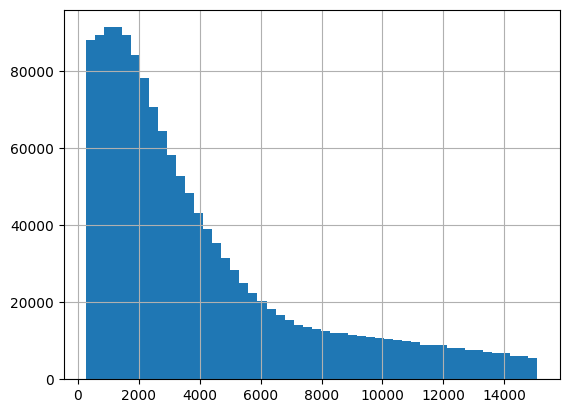

In [137]:
# Строим гистограмму
data_q_filtered['sales'].hist(bins=50)